**EJERCICIO:**

Buscar un conjunto de datos a analizar

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado

Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.

Interpretación de los resultados.

In [156]:
import numpy as np
import pandas as pd
import sidetable as stb

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
import math

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None 

In [157]:
df_travel = pd.read_csv("data/travel insurance.csv")
df_travel.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
43752,EPX,Travel Agency,Online,Cancellation Plan,No,16,SINGAPORE,13.0,0.00,NaN,34
58819,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,191,AUSTRALIA,69.3,41.58,NaN,38
45721,C2B,Airlines,Online,Silver Plan,No,16,SINGAPORE,67.8,16.95,M,39
54548,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,19,AUSTRALIA,79.2,47.52,NaN,31
2693,RAB,Airlines,Online,Value Plan,No,12,BRUNEI DARUSSALAM,15.0,6.00,NaN,35


In [158]:
# comprobamos cantidad de datos
df_travel.shape

(63326, 11)

In [159]:
# comprobamos tipo de datos

df_travel.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [160]:
# comprobamos nulos
df_travel.stb.missing()

,missing,total,percent
Gender,45107,63326,71.229827
Agency,0,63326,0.000000
Agency Type,0,63326,0.000000
Distribution Channel,0,63326,0.000000
Product Name,0,63326,0.000000
Claim,0,63326,0.000000
Duration,0,63326,0.000000
Destination,0,63326,0.000000
Net Sales,0,63326,0.000000
Commision (in value),0,63326,0.000000


In [161]:
# hay una columna con más de un 70% de nulos, la eliminamos porque no nos aporta valor añadido

df_travel= df_travel.drop("Gender", axis= 1)
df_travel.sample()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
36122,C2B,Airlines,Online,Silver Plan,No,44,SINGAPORE,25.0,6.25,70


In [162]:
# comprobamos duplicados

df_travel.duplicated().sum()

8670

In [163]:
# creamos un df sólo con los duplicados para explorarlos

df_travel_dupli = df_travel[df_travel.duplicated()]
df_travel_dupli.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
58802,C2B,Airlines,Online,Annual Silver Plan,No,365,SINGAPORE,216.00,54.00,58
27710,EPX,Travel Agency,Online,1 way Comprehensive Plan,No,4,SINGAPORE,20.00,0.00,36
47322,EPX,Travel Agency,Online,Cancellation Plan,No,22,MYANMAR,16.00,0.00,36
60424,C2B,Airlines,Online,Bronze Plan,No,6,SINGAPORE,16.00,4.00,30
4702,SSI,Airlines,Online,Ticket Protector,No,25,SINGAPORE,0.78,0.22,48


### NOTAS:

- son datos tan genéricos que puede que haya 2 personas de 25 años que hayan viajado al mismo destino durante el mismo periodo (viajes organizados por ejemplo)

- vemos que hay registros con una edad de 118, vamos a explorarlos

In [164]:
df_travel[df_travel["Age"]== 118] 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
10,JZI,Airlines,Online,Basic Plan,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.10,118
105,JWT,Airlines,Online,Value Plan,No,11,INDIA,50.0,20.00,118
220,JWT,Airlines,Online,Value Plan,No,4,INDIA,62.0,24.80,118
367,JWT,Airlines,Online,Value Plan,No,16,INDIA,50.0,20.00,118
402,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,118
...,...,...,...,...,...,...,...,...,...,...
62920,JWT,Airlines,Online,Value Plan,No,2,INDIA,31.0,12.40,118
62953,ART,Airlines,Online,Value Plan,No,14,FRANCE,59.0,20.65,118
63096,ART,Airlines,Online,Value Plan,No,42,HONG KONG,61.0,21.35,118
63182,JWT,Airlines,Online,Value Plan,No,21,INDIA,39.0,15.60,118


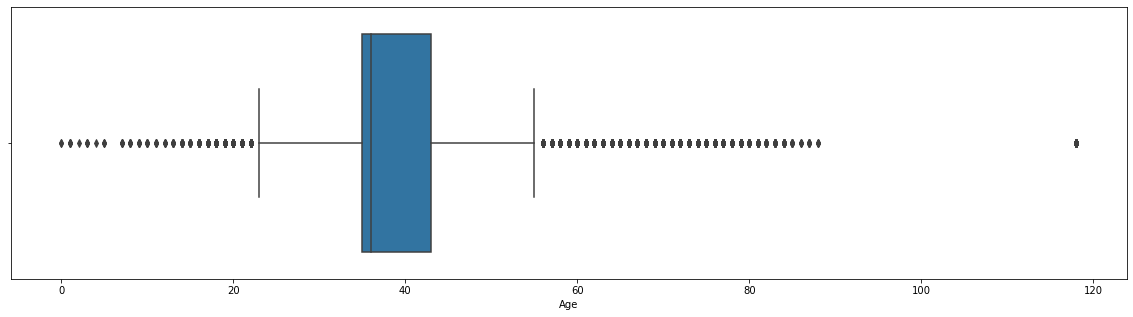

In [165]:
# exploramos outliers de la columa age:

plt.figure(figsize = (20,5))
sns.boxplot(data = df_travel, x = "Age");

<AxesSubplot:xlabel='Age', ylabel='Count'>

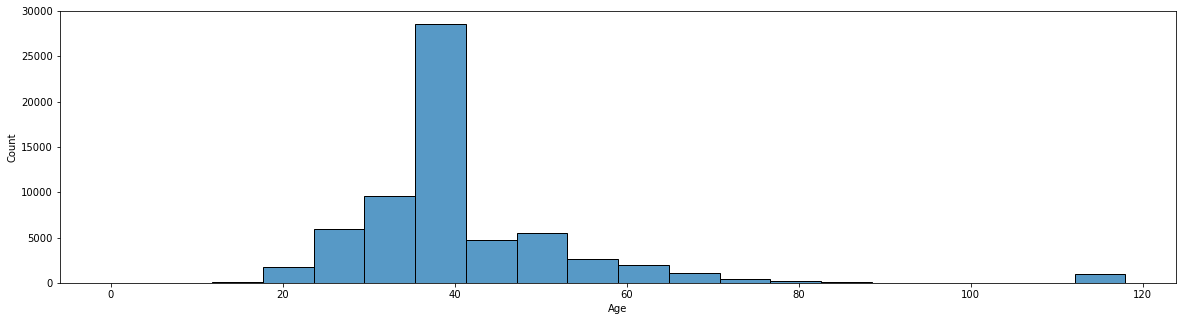

In [166]:
# exploramos la distribución de las edades

plt.figure(figsize = (20,5))
sns.histplot(data = df_travel, x = "Age", bins = 20)

Como vemos que los datos van disminuyendo en gran medida a medida que nos acercamos a los outliers, no los gestionaremos, salvo el valor de 118 años de edad que lo consideramos un error y lo sustituiremos.

In [167]:
df_travel["Age"].unique()

array([ 81,  71,  32,  41,  44,  29,  37, 118,  47,  48,  64,  36,  53,
        43,  58,  25,  34,  26,  30,  33,  35,  31,  61,  20,  46,  49,
        50,  62,  65,  24,  40,  21,  66,  57,  45,  52,  60,  27,  23,
        39,  59,  28,  67,  38,  72,  51,  55,  54,  69,  22,  78,  42,
        70,  68,  77,  63,  56,  79,  76,  16,  14,  73,  18,  19,  74,
        85,  84,  13,  75,  87,  80,  83,  12,  10,   8,  17,  15,   9,
        11,  86,   3,  82,   1,   5,  88,   2,   4,   0,   7])

In [168]:
# Cambiamos los registros a np.nan para poder gestionarlos

df_travel['Age'] = df_travel['Age'].replace(118, np.nan)

In [169]:
# El outlier de 118 lo imputaremos mediante el método KNN para que nos lo cambie por la media de sus vecinos

imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(df_travel[['Age']])
age_knn= imputerKNN.transform(df_travel[['Age']])
df_age = pd.DataFrame(age_knn, columns = ['Age'])

In [170]:
# cambiamos la columna en el df original

df_travel['Age'] = df_age['Age']

In [171]:
# comprobamos el valor completo que nos devuelve el método knn

pd.DataFrame(df_travel['Age'].value_counts()).index

Float64Index([             36.0,              31.0,              48.0,
                           35.0,              30.0,              28.0,
                           29.0,              33.0,              32.0,
                           27.0,              34.0,              37.0,
                           26.0, 38.73836258060376,              39.0,
                           38.0,              45.0,              41.0,
                           43.0,              46.0,              42.0,
                           40.0,              44.0,              25.0,
                           47.0,              49.0,              53.0,
                           24.0,              51.0,              50.0,
                           52.0,              54.0,              57.0,
                           23.0,              56.0,              22.0,
                           55.0,              58.0,              59.0,
                           60.0,              61.0,              21.0,
      

In [172]:
# Redondeamos al alza el valor que hemos recibido de KNN

df_travel['Age'] = df_travel['Age'].apply(lambda col:math.ceil(col))

Exploramos nuestra variable respuesta:

In [173]:
value_counts = df_travel["Claim"].value_counts()

<AxesSubplot:ylabel='Claim'>

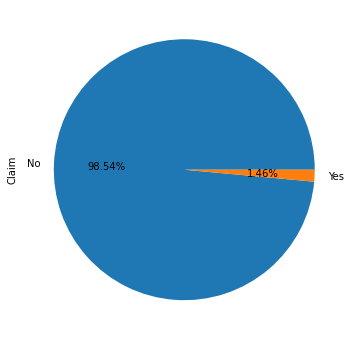

In [174]:
#Hacemos un pie de nuestra variable respuesta
value_counts.plot.pie(figsize=(6,6), autopct='%1.2f%%' )

CONCLUSIÓN: 

Nuestra variable respuesta no está balanceada, casi la totalidad de los datos corresponden a la subcategoría "no" (no presentaron reclamaciones)

In [175]:
# creamos dos df distintos: Uno para categóricas y otro para variables numéricas

df_num = df_travel.select_dtypes(include= np.number)
df_cat = df_travel.select_dtypes(exclude= np.number)

In [176]:
df_num

,Duration,Net Sales,Commision (in value),Age
0,186,-29.0,9.57,81
1,186,-29.0,9.57,71
2,65,-49.5,29.70,32
3,60,-39.6,23.76,32
4,79,-19.8,11.88,41
...,...,...,...,...
63321,111,35.0,12.25,31
63322,58,40.0,14.00,40
63323,2,18.0,6.30,57
63324,3,18.0,6.30,63


Exploramos Variables Predictoras:

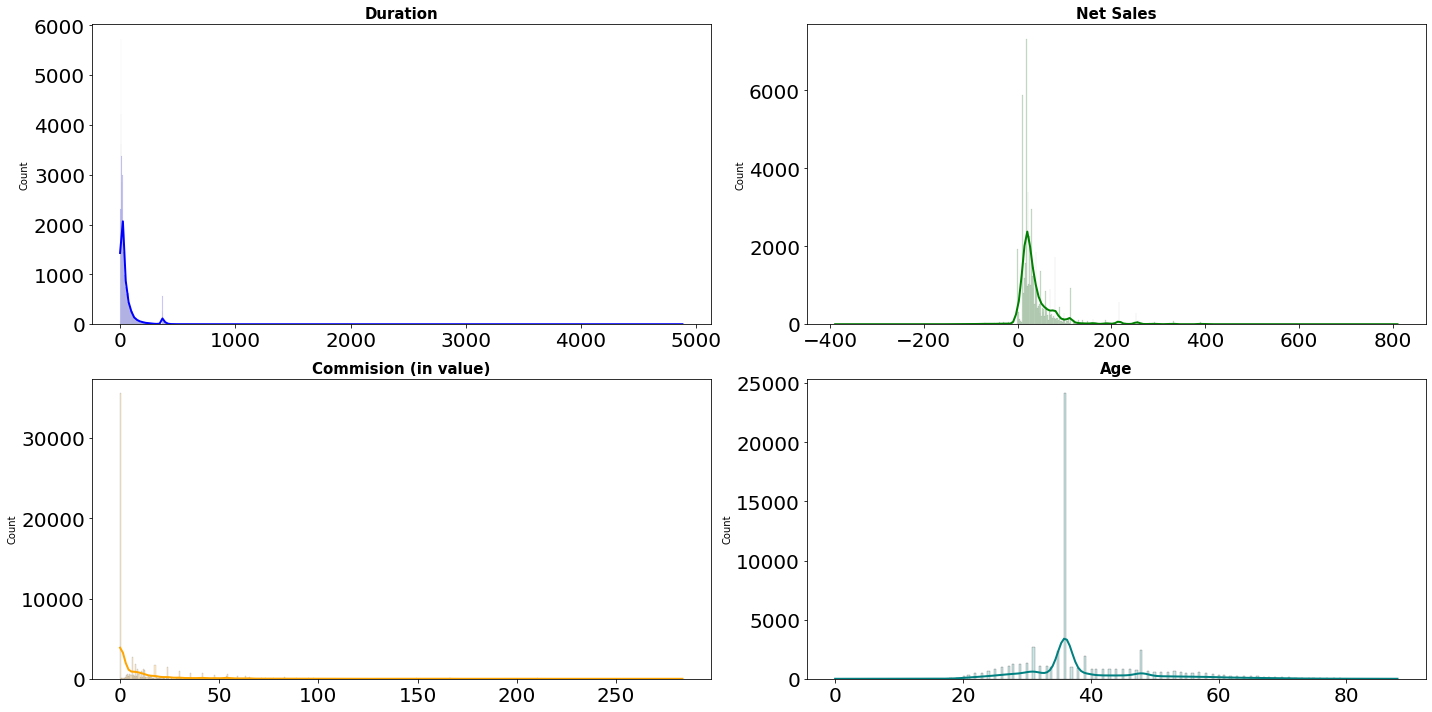

In [177]:
# NUMÉRICAS:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
lista_colores = ["blue", "green", "orange", "teal"]

axes = axes.flat
columnas_numeric = df_num.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data = df_travel,
        x = colum,
        kde = True,
        color = lista_colores[i],
        line_kws = {"linewidth": 2},
        alpha = 0.2,
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout();

CONCLUSIONES:

- Vemos que hay valores inusuales en la duración de los viajes, net sales y en commisiones así que pasamos a explorarlos más tarde.

- Como ya habíamos visto, la edad media de los clientes está cerca al 36.

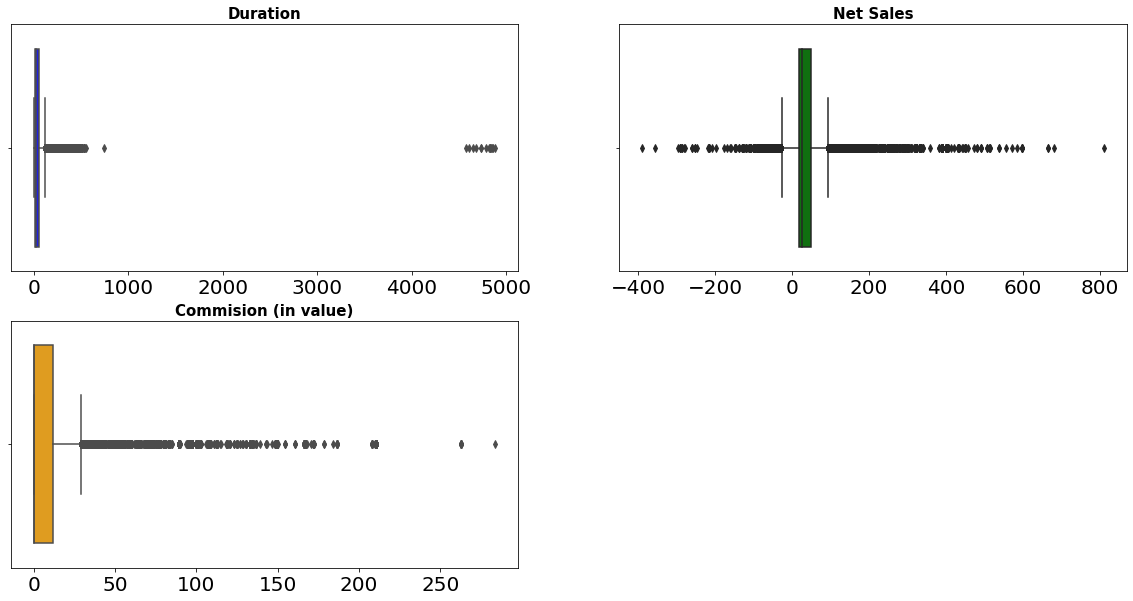

In [178]:
# exploramos outliers

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
lista_colores = ["blue", "green", "orange", "teal"]

axes = axes.flat
columnas_numeric = df_num.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        data = df_travel,
        x = colum,
        color = lista_colores[i],
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.delaxes(axes[-1]);

CONCLUSION:

- La duración del viaje obviamente hay valores que no son normales.¿son datos correctos? ¿pueden ser vuelos sólo de ida?

- En cuanto al net_value que es el dinero que la agencia recibe vemos bastantes negativos lo que nos hace pensar que puedan ser ofertas o descuentos donde la compañía no genera ingresos activos (quizás pasivos) o son datos incorrectos. ¿pueden ser seguros a sus propios empleados para conocer destinos?

- Las comisiones de las aseguradoras mayoritariamentos son nulas. Nos hace pensar que sería recomdable hacer dos estudios o separarlas por dos grupos (con comisión y sin comisión)

In [179]:
# creamos una funcion para categorizar las comisiones y, de paso, para gestionar los outliers

def cat (col):

    """Esta función nos categoriza la columna que elijamos

    Returns:
        no: cambia todos los 0 por no
        yes: cambia cualquier valor por yes
    """

    if col == 0:

        return "no"
    
    else:
        return "yes"

In [180]:
df_travel["Commision"] = df_travel["Commision (in value)"].apply(cat)

In [181]:
#Eliminamos la columna original

df_travel = df_travel.drop('Commision (in value)', axis = 1)

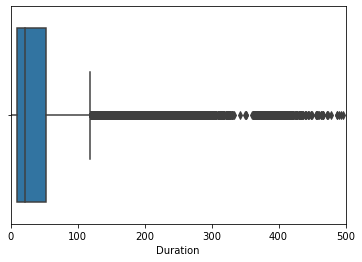

In [182]:
# analizamos más a fondo la columna Duration

sns.boxplot(x= "Duration", data= df_travel)
plt.xlim([0, 500]);

In [183]:
df_travel[df_travel["Duration"] > 365].count()

Agency                  1329
Agency Type             1329
Distribution Channel    1329
Product Name            1329
Claim                   1329
Duration                1329
Destination             1329
Net Sales               1329
Age                     1329
Commision               1329
dtype: int64

Eliminamos los utliers que pasen de 1 año, teniendo en cuenta visados de estudiantes o de trabajo que suelen pedir viaje de vuelta. Además, por lo general, no se venden billetes a más de un año vista.

In [184]:
# sacamos los indices de los outliers y los eliminamos del df

lista_365= df_travel[df_travel["Duration"] > 365].index.tolist()
df_travel = df_travel.drop(df_travel.index[lista_365])

In [185]:
# corroboramos que se han eliminado

df_travel.shape

(61997, 10)

<AxesSubplot:xlabel='Net Sales'>

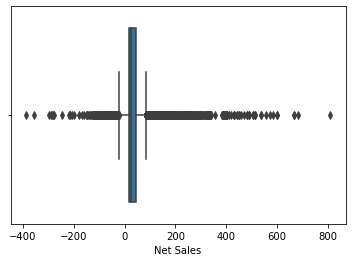

In [186]:
# exploramos los outliers de la columna Net Sales

sns.boxplot(x= "Net Sales", data= df_travel)

In [187]:
df_num.stb.freq(["Net Sales"])

,Net Sales,count,percent,cumulative_count,cumulative_percent
0,20.0,5988,9.455832,5988,9.455832
1,10.0,4748,7.497710,10736,16.953542
2,22.0,2343,3.699902,13079,20.653444
3,0.0,1884,2.975081,14963,23.628525
4,18.0,1643,2.594511,16606,26.223036
...,...,...,...,...,...
1134,-287.4,1,0.001579,63322,99.993683
1135,-289.0,1,0.001579,63323,99.995263
1136,-297.0,1,0.001579,63324,99.996842
1137,-357.5,1,0.001579,63325,99.998421


In [188]:
#Sustituimos los Outliers de las columnas Net Sales y Comission por la mediana


#calculamos los cuartiles Q1 y Q3
Q1 = np.nanpercentile(df_travel['Net Sales'], 25)
Q3 = np.nanpercentile(df_travel['Net Sales'], 75)

# calculamos el rango intercuartil
IQR = Q3 - Q1
# calculamos los límites
outlier_step = 1.5 * IQR
# filtramos nuestro dataframe para indentificar los outliers
outliers_data = df_travel[(df_travel['Net Sales'] < Q1 - outlier_step) | (df_travel['Net Sales'] > Q3 + outlier_step)]

#Sacamos la lista de los indices del dataframe con los outliers
lista_net = list(outliers_data.index) 




In [189]:
media_net = df_travel['Net Sales'].mean()

for element in lista_net:
    df_travel.loc[element, 'Net Sales'] = media_net

<AxesSubplot:xlabel='Net Sales'>

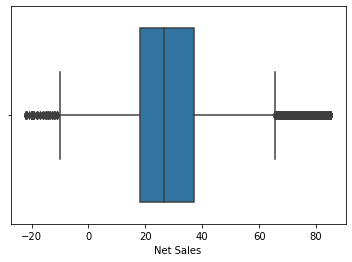

In [190]:
sns.boxplot(x= "Net Sales", data= df_travel)

<AxesSubplot:>

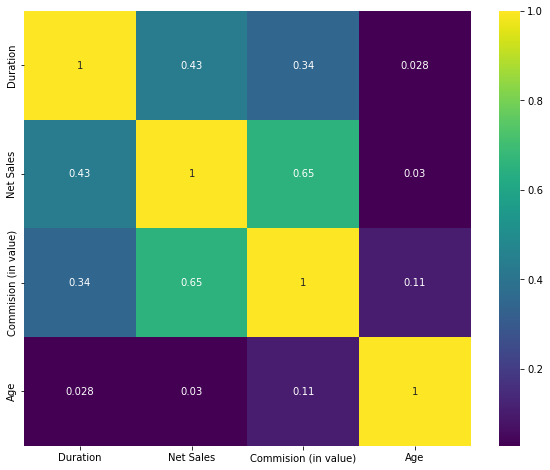

In [191]:
plt.figure(figsize=(10,8))

sns.heatmap(df_num.corr(), cmap="viridis", annot= True)

Vemos en el heatmap que no hay ninguna relación aparente entre las variables numéricas

In [192]:
#Volvemos a crear los dataframe de categóricas y numéricas, después de categorizar la columna Comission

df_cat = df_travel.select_dtypes(exclude= np.number)
df_num = df_travel.select_dtypes(include= np.number)


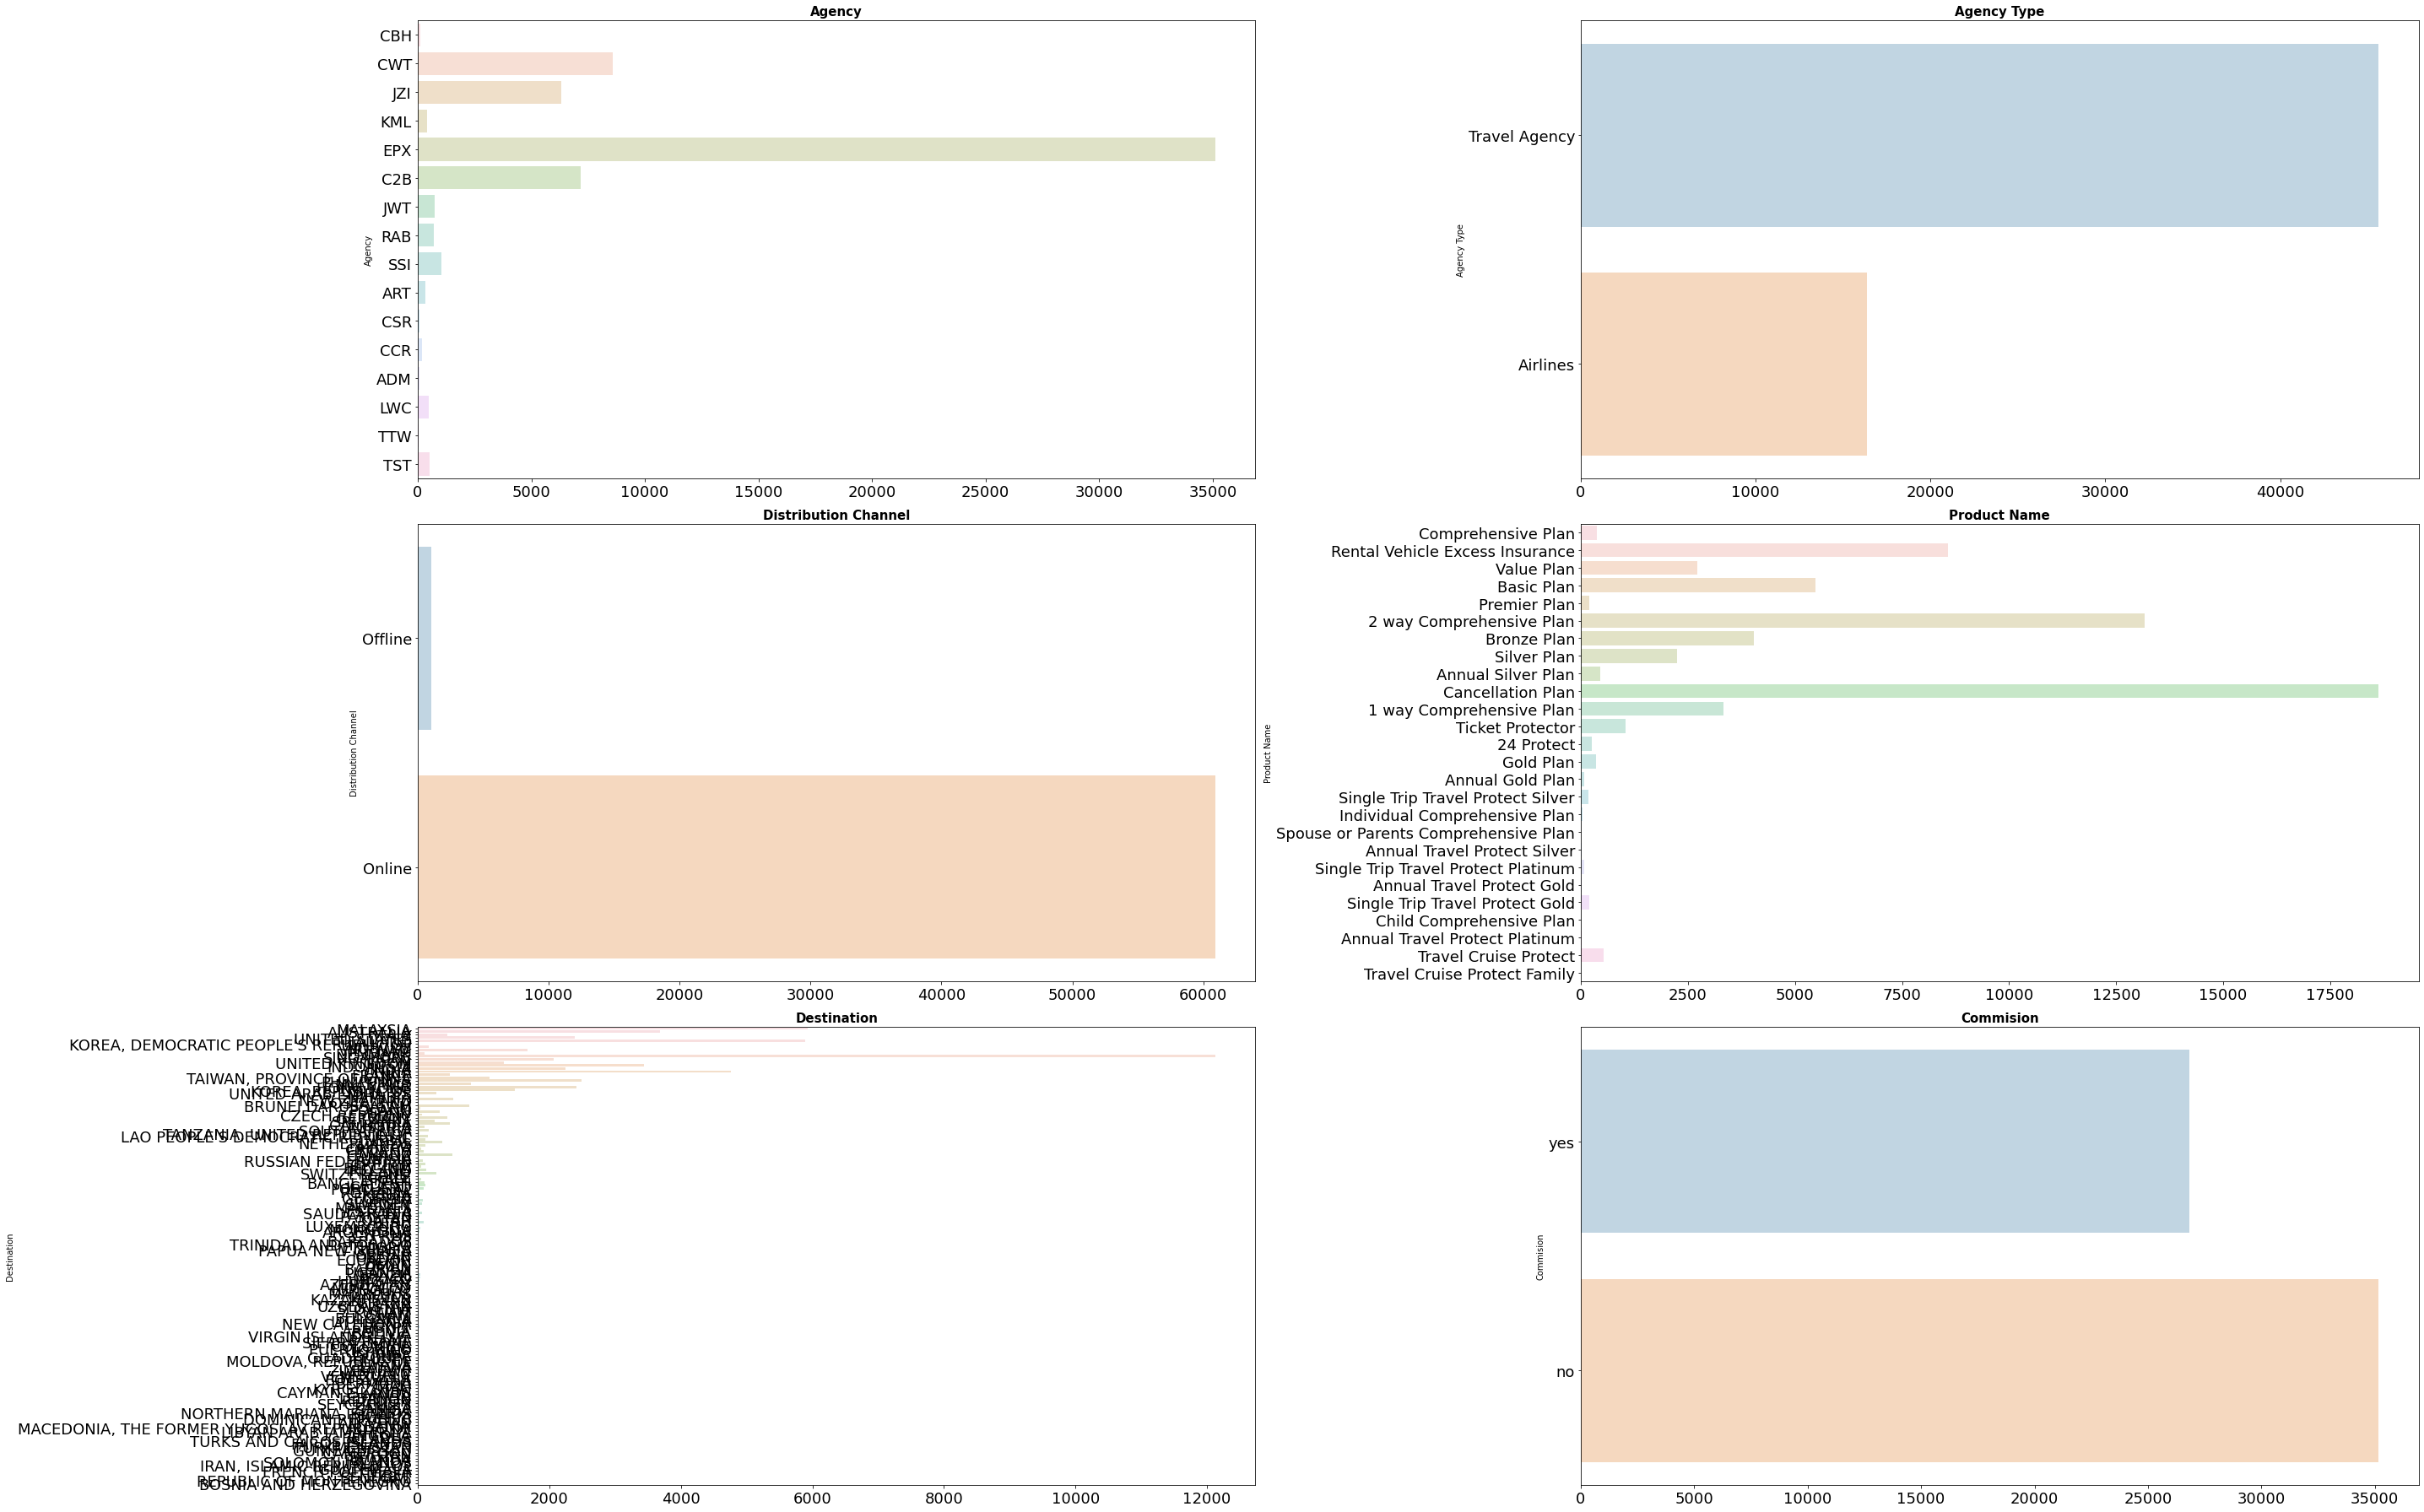

In [193]:
# CATEGÓRICAS:

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 25))
axes = axes.flat

columnas_cat = df_cat.drop("Claim", axis= 1).columns

for i, colum in enumerate(columnas_cat):
    sns.countplot(
        data = df_travel,
        y = colum,
        alpha = 0.3,
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 18)
    axes[i].set_xlabel("")

fig.tight_layout();

CONCLUSIONES:


- La agencia que más se contrata es EPX

- El tipo de agencia más usado según esto datos claramente es la agencia de viajes de manera online

- Los productos más contratados son el plan de cancelación y el 2 way comprehensive plan así como el rental vehicle excess insurance

- Se debe profundizar en la columna destinatio. ¿Hay repetidos? ¿se pueden agrupar?

In [194]:
#Exploramos la columna Destination

df_cat.stb.freq(["Destination"], thresh=50)

,Destination,count,percent,cumulative_count,cumulative_percent
0,SINGAPORE,12128,19.562237,12128,19.562237
1,MALAYSIA,5929,9.563366,18057,29.125603
2,THAILAND,5894,9.506912,23951,38.632514
3,CHINA,4757,7.672952,28708,46.305466
4,others,33289,53.694534,61997,100.000000


In [195]:
from itertools import combinations
import researchpy as rp

In [196]:
df_travel.head(1)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Age,Commision
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,36.782695,81,yes


In [197]:
#Creamos una lista con todas las combinaciones posibles de columnas para poder hacer el crosstab

predictoras = df_cat.columns.drop('Claim')
combinaciones = list(combinations(predictoras, 2))

In [198]:
combinaciones[0]

('Agency', 'Agency Type')

In [199]:
#Realizamos un crosstab para ver la relación entre las variables categóricas

for tupla in combinaciones:
        crosstab= rp.crosstab(df_cat[tupla[0]], df_cat[tupla[1]], prop = 'cell')
        
        display(crosstab)
        

Agency Type                      
Agency Type    Airlines Travel Agency     All
Agency                                       
ADM                0.00          0.13    0.13
ART                0.53          0.00    0.53
C2B               11.58          0.00   11.58
CBH                0.00          0.16    0.16
CCR                0.00          0.31    0.31
CSR                0.00          0.14    0.14
CWT                0.00         13.84   13.84
EPX                0.00         56.65   56.65
JWT                1.21          0.00    1.21
JZI               10.21          0.00   10.21
KML                0.00          0.63    0.63
LWC                0.00          0.81    0.81
RAB                1.17          0.00    1.17
SSI                1.68          0.00    1.68
TST                0.00          0.85    0.85
TTW                0.00          0.09    0.09
All               26.39         73.61  100.00

Distribution Channel               
Distribution Channel              Offline Online     All
Agency                                                  
ADM                                  0.00   0.13    0.13
ART                                  0.00   0.53    0.53
C2B                                  0.00  11.58   11.58
CBH                                  0.16   0.00    0.16
CCR                                  0.31   0.00    0.31
CSR                                  0.14   0.00    0.14
CWT                                  0.01  13.83   13.84
EPX                                  0.11  56.53   56.65
JWT                                  0.00   1.21    1.21
JZI                                  0.01  10.20   10.21
KML                                  0.00   0.63    0.63
LWC                                  0.00   0.81    0.81
RAB                                  0.00   1.17    1.17
SSI                                  0.02   1.66    1.68
TST                                  0.85   0.00    0.85
TTW                                  0.09   0.00    0.09
All                                  1.72  98.28  100.00

Product Name                                      \
Product Name 1 way Comprehensive Plan 2 way Comprehensive Plan 24 Protect   
Agency                                                                      
ADM                              0.00                     0.00        0.0   
ART                              0.00                     0.00        0.4   
C2B                              0.00                     0.00        0.0   
CBH                              0.00                     0.00        0.0   
CCR                              0.00                     0.00        0.0   
CSR                              0.00                     0.00        0.0   
CWT                              0.00                     0.00        0.0   
EPX                              5.37                    21.22        0.0   
JWT                              0.00                     0.00        0.0   
JZI                              0.00                     0.00        0.0   
KML                              0.00                     0.00        0.0   
LWC                              0.00                     0.00        0.0   
RAB                              0.00                     0.00        0.0   
SSI                              0.00                     0.00        0.0   
TST                              0.00                     0.00        0.0   
TTW                              0.00                     0.00        0.0   
All                              5.37                    21.22        0.4   

                                                                             \
Product Name Annual Gold Plan Annual Silver Plan Annual Travel Protect Gold   
Agency                                                                        
ADM                      0.00               0.00                       0.00   
ART                      0.00               0.00                       0.00   
C2B                      0.12               0.74                       0.00   
CBH                      0.00               0.00                       0.00   
CCR                      0.00               0.00                       0.00   
CSR                      0.00               0.00                       0.00   
CWT                      0.00               0.00                       0.00   
EPX                      0.00               0.00                       0.00   
JWT                      0.00               0.00                       0.00   
JZI                      0.00               0.00                       0.00   
KML                      0.00               0.00                       0.00   
LWC                      0.00               0.00                       0.04   
RAB                      0.00               0.00                       0.00   
SSI                      0.00               0.00                       0.00   
TST                      0.00               0.00                       0.00   
TTW                      0.00               0.00                       0.00   
All                      0.12               0.74                       0.04   

                                                                          \
Product Name Annual Travel Protect Platinum Annual Travel Protect Silver   
Agency                                                                     
ADM                                    0.00                         0.00   
ART                                    0.00                         0.00   
C2B                                    0.00                         0.00   
CBH                                    0.00                         0.00   
CCR                                    0.00                         0.00   
CSR                                    0.00                         0.00   
CWT                                    0.00                         0.00   
EPX                                    0.00                         0.00   
JWT                                    0.00                        

Destination                                                        \
Destination     ALBANIA ANGOLA ARGENTINA ARMENIA AUSTRALIA AUSTRIA AZERBAIJAN   
Agency                                                                          
ADM                 0.0    0.0      0.00     0.0      0.00    0.00       0.00   
ART                 0.0    0.0      0.00     0.0      0.00    0.00       0.00   
C2B                 0.0    0.0      0.00     0.0      0.00    0.00       0.00   
CBH                 0.0    0.0      0.00     0.0      0.00    0.00       0.00   
CCR                 0.0    0.0      0.00     0.0      0.00    0.00       0.00   
CSR                 0.0    0.0      0.00     0.0      0.00    0.00       0.00   
CWT                 0.0    0.0      0.01     0.0      4.04    0.08       0.00   
EPX                 0.0    0.0      0.03     0.0      1.51    0.07       0.01   
JWT                 0.0    0.0      0.00     0.0      0.00    0.00       0.00   
JZI                 0.0    0.0      0.00     0.0      0.32    0.01       0.00   
KML                 0.0    0.0      0.00     0.0      0.00    0.00       0.00   
LWC                 0.0    0.0      0.00     0.0      0.04    0.01       0.00   
RAB                 0.0    0.0      0.00     0.0      0.01    0.00       0.00   
SSI                 0.0    0.0      0.00     0.0      0.00    0.00       0.00   
TST                 0.0    0.0      0.00     0.0      0.00    0.00       0.00   
TTW                 0.0    0.0      0.00     0.0      0.01    0.00       0.00   
All                 0.0    0.0      0.04     0.0      5.94    0.16       0.01   

                                                                              \
Destination BAHRAIN BANGLADESH BARBADOS BELARUS BELGIUM BENIN BERMUDA BHUTAN   
Agency                                                                         
ADM            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.00   
ART            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.00   
C2B            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.00   
CBH            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.00   
CCR            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.00   
CSR            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.00   
CWT            0.00       0.00      0.0     0.0    0.01   0.0     0.0   0.00   
EPX            0.01       0.14      0.0     0.0    0.05   0.0     0.0   0.00   
JWT            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.00   
JZI            0.00       0.02      0.0     0.0    0.00   0.0     0.0   0.00   
KML            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.00   
LWC            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.01   
RAB            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.00   
SSI            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.00   
TST            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.00   
TTW            0.00       0.00      0.0     0.0    0.00   0.0     0.0   0.00   
All            0.02       0.16      0.0     0.0    0.07   0.0     0.0   0.01   

                                                                              \
Destination BOLIVIA BOSNIA AND HERZEGOVINA BOTSWANA BRAZIL BRUNEI DARUSSALAM   
Agency                                                                         
ADM            0.00                    0.0      0.0   0.00              0.00   
ART            0.00                    0.0      0.0   0.00              0.00   
C2B            0.00                    0.0      0.0   0.00              0.00   
CBH            0.00                    0.0      0.0   0.00              0.00   
CCR            0.00                    0.0      0.0   0.00              0.00   
CSR            0.00                    0.0      0.0   0.00              0.00   
CWT            0.00                    0.0      0.0   0.00            

Commision               
Commision        no    yes     All
Agency                            
ADM            0.00   0.13    0.13
ART            0.00   0.53    0.53
C2B            0.00  11.58   11.58
CBH            0.00   0.16    0.16
CCR            0.00   0.31    0.31
CSR            0.00   0.14    0.14
CWT            0.00  13.84   13.84
EPX           56.65   0.00   56.65
JWT            0.00   1.21    1.21
JZI            0.00  10.21   10.21
KML            0.00   0.63    0.63
LWC            0.00   0.81    0.81
RAB            0.00   1.17    1.17
SSI            0.00   1.68    1.68
TST            0.00   0.85    0.85
TTW            0.09   0.00    0.09
All           56.74  43.26  100.00

Distribution Channel               
Distribution Channel              Offline Online     All
Agency Type                                             
Airlines                             0.03  26.35   26.39
Travel Agency                        1.69  71.93   73.61
All                                  1.72  98.28  100.00

Product Name                                      \
Product Name  1 way Comprehensive Plan 2 way Comprehensive Plan 24 Protect   
Agency Type                                                                  
Airlines                          0.00                     0.00        0.4   
Travel Agency                     5.37                    21.22        0.0   
All                               5.37                    21.22        0.4   

                                                                              \
Product Name  Annual Gold Plan Annual Silver Plan Annual Travel Protect Gold   
Agency Type                                                                    
Airlines                  0.12               0.74                       0.00   
Travel Agency             0.00               0.00                       0.04   
All                       0.12               0.74                       0.04   

                                                                           \
Product Name  Annual Travel Protect Platinum Annual Travel Protect Silver   
Agency Type                                                                 
Airlines                                0.00                         0.00   
Travel Agency                           0.02                         0.02   
All                                     0.02                         0.02   

                                                        \
Product Name  Basic Plan Bronze Plan Cancellation Plan   
Agency Type                                              
Airlines            8.82        6.52              0.00   
Travel Agency       0.00        0.00             30.05   
All                 8.82        6.52             30.05   

                                                                     \
Product Name  Child Comprehensive Plan Comprehensive Plan Gold Plan   
Agency Type                                                           
Airlines                          0.00               0.00      0.57   
Travel Agency                     0.01               0.59      0.00   
All                               0.01               0.59      0.57   

                                                          \
Product Name  Individual Comprehensive Plan Premier Plan   
Agency Type                                                
Airlines                               0.00         0.01   
Travel Agency                          0.07         0.30   
All                                    0.07         0.31   

                                                           \
Product Name  Rental Vehicle Excess Insurance Silver Plan   
Agency Type                                                 
Airlines                                 0.00        3.63   
Travel Agency                           13.84        0.00   
All                                     13.84        3.63   

                                               \
Product Name  Single Trip Travel Protect Gold   
Agency Type                                     
Airlines                                 0.00   
Travel Agency                            0.33   
All                                      0.33   

                                                   \
Product Name  Single Trip Travel Protect Platinum   
Agency Type                                         
Airlines                                     0.00   
Travel Agency                                0.12   
All                                          0.12   

                                                 \
Product Name  Single Trip Travel Protect Silver   
Agency Type                                       
Airlines                                   0.00   
Travel Agency                              0.28   
All                                        0.28   

                                                                     \
Product Name  Spouse or Parents Comprehensive Plan Ticket Protector   
Agency Type                                   

Destination                                             \
Destination       ALBANIA ANGOLA ARGENTINA ARMENIA AUSTRALIA AUSTRIA   
Agency Type                                                            
Airlines              0.0    0.0      0.00     0.0      0.33    0.01   
Travel Agency         0.0    0.0      0.04     0.0      5.61    0.16   
All                   0.0    0.0      0.04     0.0      5.94    0.16   

                                                                            \
Destination   AZERBAIJAN BAHRAIN BANGLADESH BARBADOS BELARUS BELGIUM BENIN   
Agency Type                                                                  
Airlines            0.00    0.00       0.02      0.0     0.0    0.00   0.0   
Travel Agency       0.01    0.02       0.14      0.0     0.0    0.07   0.0   
All                 0.01    0.02       0.16      0.0     0.0    0.07   0.0   

                                                                             \
Destination   BERMUDA BHUTAN BOLIVIA BOSNIA AND HERZEGOVINA BOTSWANA BRAZIL   
Agency Type                                                                   
Airlines          0.0   0.00    0.00                    0.0      0.0   0.00   
Travel Agency     0.0   0.01    0.02                    0.0      0.0   0.06   
All               0.0   0.01    0.02                    0.0      0.0   0.06   

                                                                   \
Destination   BRUNEI DARUSSALAM BULGARIA CAMBODIA CAMEROON CANADA   
Agency Type                                                         
Airlines                   1.16     0.00     0.09      0.0   0.04   
Travel Agency              0.10     0.02     0.70      0.0   0.81   
All                        1.26     0.02     0.80      0.0   0.85   

                                                                             \
Destination   CAYMAN ISLANDS CHILE CHINA COLOMBIA COSTA RICA CROATIA CYPRUS   
Agency Type                                                                   
Airlines                 0.0  0.00  1.90     0.00       0.00    0.00   0.00   
Travel Agency            0.0  0.02  5.77     0.02       0.01    0.09   0.02   
All                      0.0  0.02  7.67     0.02       0.01    0.09   0.02   

                                                                               \
Destination   CZECH REPUBLIC DENMARK DOMINICAN REPUBLIC ECUADOR EGYPT ESTONIA   
Agency Type                                                                     
Airlines                0.00    0.01                0.0    0.00  0.00    0.00   
Travel Agency           0.11    0.16                0.0    0.01  0.03    0.01   
All                     0.11    0.17                0.0    0.01  0.03    0.01   

                                                                            \
Destination   ETHIOPIA FAROE ISLANDS  FIJI FINLAND FRANCE FRENCH POLYNESIA   
Agency Type                                                                  
Airlines          0.00           0.0  0.00    0.01   0.03              0.0   
Travel Agency     0.01           0.0  0.02    0.14   0.75              0.0   
All               0.01           0.0  0.02    0.15   0.78              0.0   

                                                                              \
Destination   GEORGIA GERMANY GHANA GREECE GUADELOUPE  GUAM GUATEMALA GUINEA   
Agency Type                                                                    
Airlines         0.00    0.04  0.00   0.00        0.0  0.00       0.0   0.01   
Travel Agency    0.02    0.70  0.01   0.18        0.0  0.01       0.0   0.00   
All              0.02    0.74  0.01   0.18        0.0  0.01       0.0   0.01   

                                                                              \
Destination   GUINEA-BISSAU GUYANA HONG KONG HUNGARY ICELAND INDIA INDONESIA   
Agency Type                                                                    
Airlines                0.0    0.0      1.03    0.00    0.00  1.39    

Commision               
Commision            no    yes     All
Agency Type                           
Airlines           0.00  26.39   26.39
Travel Agency     56.74  16.88   73.61
All               56.74  43.26  100.00

Product Name                           \
Product Name         1 way Comprehensive Plan 2 way Comprehensive Plan   
Distribution Channel                                                     
Offline                                  0.01                     0.10   
Online                                   5.36                    21.12   
All                                      5.37                    21.22   

                                                                     \
Product Name         24 Protect Annual Gold Plan Annual Silver Plan   
Distribution Channel                                                  
Offline                     0.0             0.00               0.00   
Online                      0.4             0.12               0.74   
All                         0.4             0.12               0.74   

                                                 \
Product Name         Annual Travel Protect Gold   
Distribution Channel                              
Offline                                    0.00   
Online                                     0.04   
All                                        0.04   

                                                     \
Product Name         Annual Travel Protect Platinum   
Distribution Channel                                  
Offline                                        0.00   
Online                                         0.02   
All                                            0.02   

                                                                          \
Product Name         Annual Travel Protect Silver Basic Plan Bronze Plan   
Distribution Channel                                                       
Offline                                      0.00       0.01        0.00   
Online                                       0.02       8.81        6.52   
All                                          0.02       8.82        6.52   

                                                                 \
Product Name         Cancellation Plan Child Comprehensive Plan   
Distribution Channel                                              
Offline                           0.01                     0.01   
Online                           30.04                     0.00   
All                              30.05                     0.01   

                                                   \
Product Name         Comprehensive Plan Gold Plan   
Distribution Channel                                
Offline                            0.59      0.00   
Online                             0.00      0.57   
All                                0.59      0.57   

                                                                 \
Product Name         Individual Comprehensive Plan Premier Plan   
Distribution Channel                                              
Offline                                       0.07         0.03   
Online                                        0.00         0.28   
All                                           0.07         0.31   

                                                                  \
Product Name         Rental Vehicle Excess Insurance Silver Plan   
Distribution Channel                                               
Offline                                         0.01        0.00   
Online                                         13.83        3.63   
All                                            13.84        3.63   

                                                      \
Product Name         Single Trip Travel Protect Gold   
Distribution Channel                                   
Offline                                         0.00   
Online                                          0.33   
All                                             0.33   

                                                          \
Product Name         Single Trip Travel Protect Platinum   
Distribution Channel                                       
Offline        

Destination                                             \
Destination              ALBANIA ANGOLA ARGENTINA ARMENIA AUSTRALIA AUSTRIA   
Distribution Channel                                                          
Offline                      0.0    0.0      0.00     0.0      0.02    0.00   
Online                       0.0    0.0      0.04     0.0      5.92    0.16   
All                          0.0    0.0      0.04     0.0      5.94    0.16   

                                                                             \
Destination          AZERBAIJAN BAHRAIN BANGLADESH BARBADOS BELARUS BELGIUM   
Distribution Channel                                                          
Offline                    0.00    0.00       0.00      0.0     0.0    0.00   
Online                     0.01    0.02       0.16      0.0     0.0    0.07   
All                        0.01    0.02       0.16      0.0     0.0    0.07   

                                                                          \
Destination          BENIN BERMUDA BHUTAN BOLIVIA BOSNIA AND HERZEGOVINA   
Distribution Channel                                                       
Offline                0.0     0.0   0.00    0.00                    0.0   
Online                 0.0     0.0   0.01    0.02                    0.0   
All                    0.0     0.0   0.01    0.02                    0.0   

                                                                          \
Destination          BOTSWANA BRAZIL BRUNEI DARUSSALAM BULGARIA CAMBODIA   
Distribution Channel                                                       
Offline                   0.0   0.00              0.00     0.00      0.0   
Online                    0.0   0.06              1.26     0.02      0.8   
All                       0.0   0.06              1.26     0.02      0.8   

                                                                          \
Destination          CAMEROON CANADA CAYMAN ISLANDS CHILE CHINA COLOMBIA   
Distribution Channel                                                       
Offline                   0.0   0.00            0.0  0.00  0.03     0.00   
Online                    0.0   0.85            0.0  0.02  7.65     0.02   
All                       0.0   0.85            0.0  0.02  7.67     0.02   

                                                                       \
Destination          COSTA RICA CROATIA CYPRUS CZECH REPUBLIC DENMARK   
Distribution Channel                                                    
Offline                    0.00    0.00   0.00           0.00    0.00   
Online                     0.01    0.09   0.02           0.11    0.17   
All                        0.01    0.09   0.02           0.11    0.17   

                                                                        \
Destination          DOMINICAN REPUBLIC ECUADOR EGYPT ESTONIA ETHIOPIA   
Distribution Channel                                                     
Offline                             0.0    0.00  0.00    0.00     0.00   
Online                              0.0    0.01  0.03    0.01     0.01   
All                                 0.0    0.01  0.03    0.01     0.01   

                                                                          \
Destination          FAROE ISLANDS  FIJI FINLAND FRANCE FRENCH POLYNESIA   
Distribution Channel                                                       
Offline                        0.0  0.00    0.00   0.00              0.0   
Online                         0.0  0.02    0.15   0.78              0.0   
All                            0.0  0.02    0.15   0.78              0.0   

                                                                              \
Destination          GEORGIA GERMANY GHANA GREECE GUADELOUPE  GUAM GUATEMALA   
Distribution Channel                                                           
Offline                 0.00    0.00  0.00   0.00        0.0  0.00       0.0   
Online                  0.02    0.74  0

Commision               
Commision                   no    yes     All
Distribution Channel                         
Offline                   0.20   1.51    1.72
Online                   56.53  41.75   98.28
All                      56.74  43.26  100.00

Destination                           \
Destination                              ALBANIA ANGOLA ARGENTINA ARMENIA   
Product Name                                                                
1 way Comprehensive Plan                     0.0    0.0      0.00     0.0   
2 way Comprehensive Plan                     0.0    0.0      0.00     0.0   
24 Protect                                   0.0    0.0      0.00     0.0   
Annual Gold Plan                             0.0    0.0      0.00     0.0   
Annual Silver Plan                           0.0    0.0      0.00     0.0   
Annual Travel Protect Gold                   0.0    0.0      0.00     0.0   
Annual Travel Protect Platinum               0.0    0.0      0.00     0.0   
Annual Travel Protect Silver                 0.0    0.0      0.00     0.0   
Basic Plan                                   0.0    0.0      0.00     0.0   
Bronze Plan                                  0.0    0.0      0.00     0.0   
Cancellation Plan                            0.0    0.0      0.02     0.0   
Child Comprehensive Plan                     0.0    0.0      0.00     0.0   
Comprehensive Plan                           0.0    0.0      0.00     0.0   
Gold Plan                                    0.0    0.0      0.00     0.0   
Individual Comprehensive Plan                0.0    0.0      0.00     0.0   
Premier Plan                                 0.0    0.0      0.00     0.0   
Rental Vehicle Excess Insurance              0.0    0.0      0.01     0.0   
Silver Plan                                  0.0    0.0      0.00     0.0   
Single Trip Travel Protect Gold              0.0    0.0      0.00     0.0   
Single Trip Travel Protect Platinum          0.0    0.0      0.00     0.0   
Single Trip Travel Protect Silver            0.0    0.0      0.00     0.0   
Spouse or Parents Comprehensive Plan         0.0    0.0      0.00     0.0   
Ticket Protector                             0.0    0.0      0.00     0.0   
Travel Cruise Protect                        0.0    0.0      0.00     0.0   
Travel Cruise Protect Family                 0.0    0.0      0.00     0.0   
Value Plan                                   0.0    0.0      0.00     0.0   
All                                          0.0    0.0      0.04     0.0   

                                                                           \
Destination                          AUSTRALIA AUSTRIA AZERBAIJAN BAHRAIN   
Product Name                                                                
1 way Comprehensive Plan                  0.14    0.00       0.00    0.00   
2 way Comprehensive Plan                  0.59    0.02       0.00    0.01   
24 Protect                                0.00    0.00       0.00    0.00   
Annual Gold Plan                          0.00    0.00       0.00    0.00   
Annual Silver Plan                        0.00    0.00       0.00    0.00   
Annual Travel Protect Gold                0.00    0.00       0.00    0.00   
Annual Travel Protect Platinum            0.00    0.00       0.00    0.00   
Annual Travel Protect Silver              0.00    0.00       0.00    0.00   
Basic Plan                                0.19    0.00       0.00    0.00   
Bronze Plan                               0.00    0.00       0.00    0.00   
Cancellation Plan                         0.79    0.05       0.00    0.00   
Child Comprehensive Plan                  0.00    0.00       0.00    0.00   
Comprehensive Plan                        0.00    0.00       0.00    0.00   
Gold Plan                                 0.00    0.00       0.00    0.00   
Individual Comprehensive Plan             0.01    0.00       0.00    0.00   
Premier Plan                              0.00    0.00       0.00    0.00   
Rental Vehicle Excess Insurance           4.04    0.08       0.00    0.00   
Silver Plan                               0.00    0.00       0.00    0.00   
Single Trip Travel Protect Gold           0.02    0.00       0.00    0.00   
Single Trip Travel Protect Plati

Commision               
Commision                                   no    yes     All
Product Name                                                 
1 way Comprehensive Plan                  5.37   0.00    5.37
2 way Comprehensive Plan                 21.22   0.00   21.22
24 Protect                                0.00   0.40    0.40
Annual Gold Plan                          0.00   0.12    0.12
Annual Silver Plan                        0.00   0.74    0.74
Annual Travel Protect Gold                0.00   0.04    0.04
Annual Travel Protect Platinum            0.00   0.02    0.02
Annual Travel Protect Silver              0.00   0.02    0.02
Basic Plan                                0.00   8.82    8.82
Bronze Plan                               0.00   6.52    6.52
Cancellation Plan                        30.05   0.00   30.05
Child Comprehensive Plan                  0.01   0.00    0.01
Comprehensive Plan                        0.00   0.59    0.59
Gold Plan                                 0.00   0.57    0.57
Individual Comprehensive Plan             0.07   0.00    0.07
Premier Plan                              0.00   0.31    0.31
Rental Vehicle Excess Insurance           0.00  13.84   13.84
Silver Plan                               0.00   3.63    3.63
Single Trip Travel Protect Gold           0.00   0.33    0.33
Single Trip Travel Protect Platinum       0.00   0.12    0.12
Single Trip Travel Protect Silver         0.00   0.28    0.28
Spouse or Parents Comprehensive Plan      0.01   0.00    0.01
Ticket Protector                          0.00   1.68    1.68
Travel Cruise Protect                     0.00   0.85    0.85
Travel Cruise Protect Family              0.00   0.00    0.00
Value Plan                                0.00   4.38    4.38
All                                      56.74  43.26  100.00

Commision               
Commision                   no    yes     All
Destination                                  
ALBANIA                   0.00   0.00    0.00
ANGOLA                    0.00   0.00    0.00
ARGENTINA                 0.03   0.01    0.04
ARMENIA                   0.00   0.00    0.00
AUSTRALIA                 1.53   4.41    5.94
...                        ...    ...     ...
VIET NAM                  2.22   0.47    2.69
VIRGIN ISLANDS, U.S.      0.00   0.00    0.00
ZAMBIA                    0.00   0.00    0.00
ZIMBABWE                  0.00   0.00    0.00
All                      56.74  43.26  100.00

[150 rows x 3 columns]

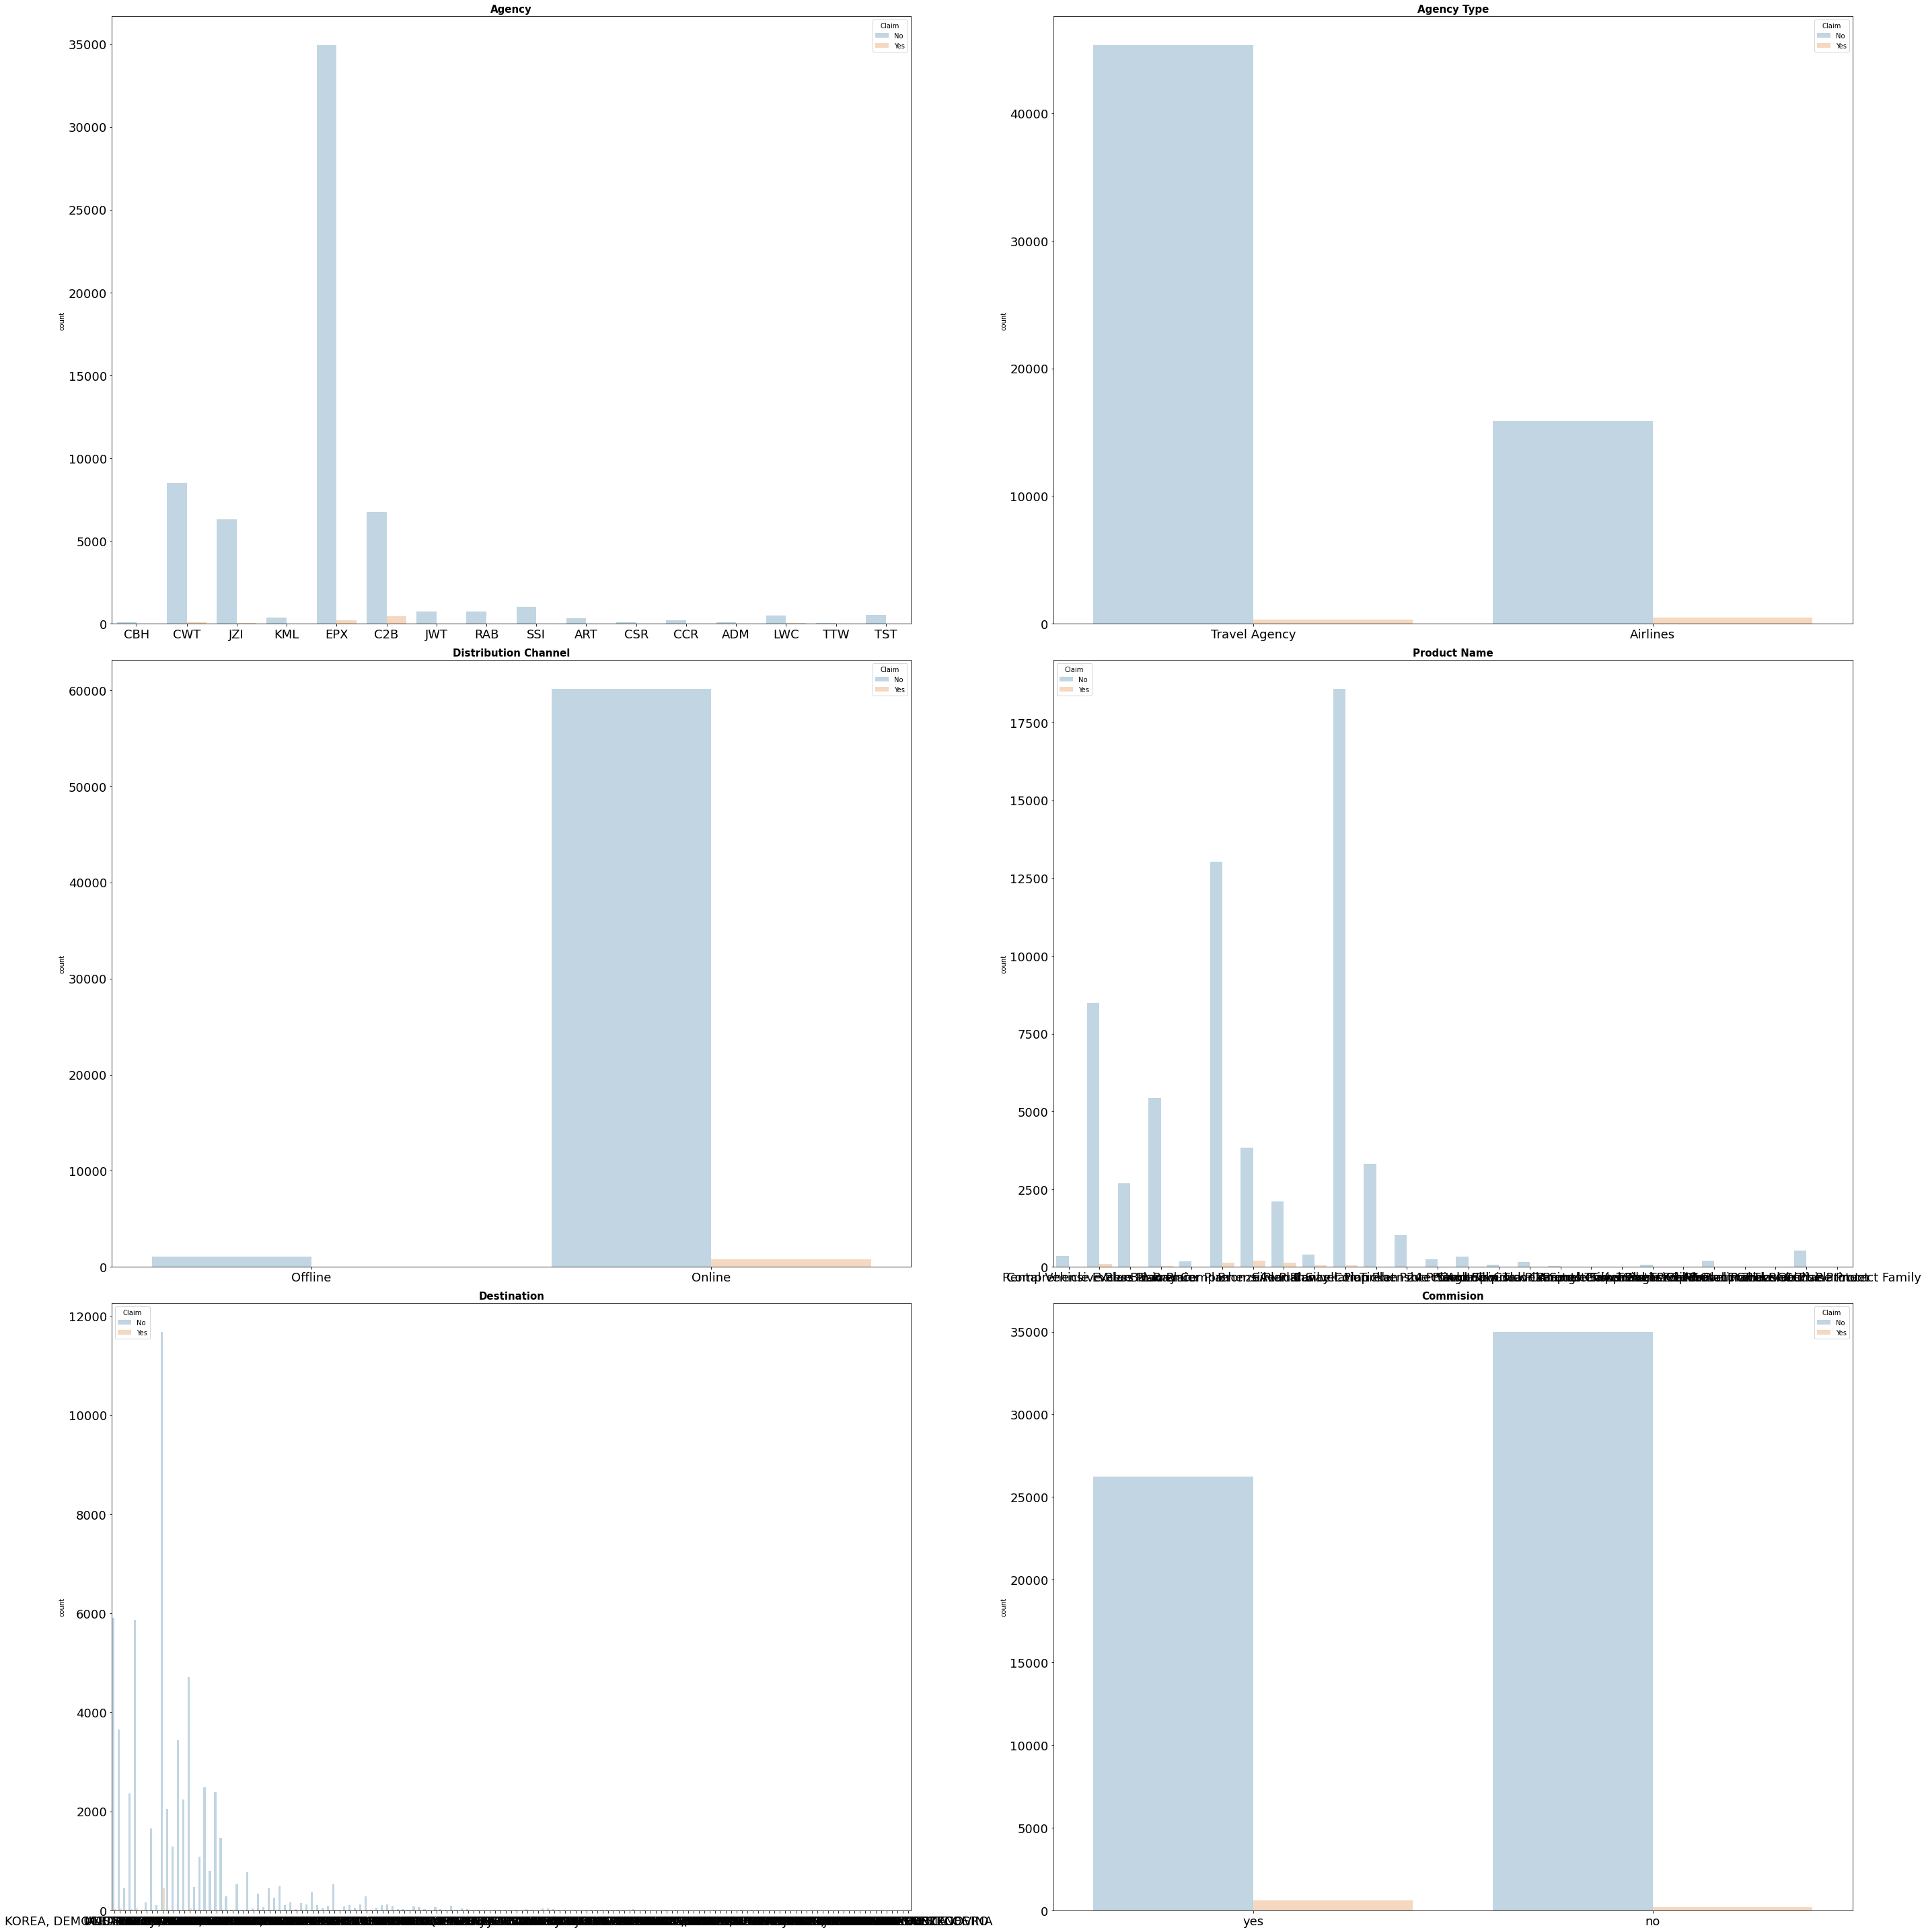

In [203]:
#Vemos visualmente las relaciones entre la variable respuesta y las variables predictoras categóricas

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 40))
axes = axes.flat

columnas_cat = df_cat.drop("Claim", axis= 1).columns

for i, colum in enumerate(columnas_cat):
    sns.countplot(
        data = df_travel,
        x = colum,
        hue = 'Claim',
        alpha = 0.3,
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 18)
    axes[i].set_xlabel("")

fig.tight_layout();

In [201]:
#Guardamos los dataframes con los cambios realizados

df_travel.to_pickle('data/df_travel_1.pkl')

In [202]:
df_num.to_pickle('data/df_num_1.pkl')
df_cat.to_pickle('data/df_cat_1.pkl')